In [55]:
import numpy as np
import pandas as pd
import config

import matplotlib.pyplot as plt
#SQL
import mysql.connector 
from mysql.connector import errorcode
from sqlalchemy import create_engine

In [2]:
def stock_analysis(sql_table):
    cnx = mysql.connector.connect(
        host = config.host,
        user = config.user,
        password = config.passwd,
        database = config.db_name
    )
    cur = cnx.cursor()
    cur.execute(f"""SELECT * FROM stocktwits.{sql_table};""")
    df_sql = pd.DataFrame(cur.fetchall())
    df_sql.columns = [x[0] for x in cur.description]
    return df_sql

In [72]:
apple = stock_analysis('aapl')

In [73]:
def stock_chart(stock_df):
    stock_df['close'] = stock_df['close'].shift(-1)
    stock_df['percent_change'] = ((stock_df['close'] - stock_df['open']) / stock_df['open']) * 100
    negetive = stock_df[(stock_df['sentiment'] < 0) & (stock_df['percent_change'] < 0)]  
    positive = stock_df[(stock_df['sentiment'] > 0) & (stock_df['percent_change'] > 0)] 
    neutral_1 = stock_df[(stock_df['sentiment'] > 0) & (stock_df['percent_change'] < 0)] 
    neutral_2 = stock_df[(stock_df['sentiment'] < 0) & (stock_df['percent_change'] > 0)]
    neutral = pd.concat([neutral_1, neutral_2])
    
    fig, ax = plt.subplots()
    ax.scatter(positive['sentiment'], positive['percent_change'], label='Positive Correlation', color='g')
    ax.scatter(negetive['sentiment'], negetive['percent_change'], label='Negetive Correlation', color='r')
    ax.scatter(neutral['sentiment'], neutral['percent_change'], label='neutral', color='black')

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Price Change %')
    ax.set_title('Sentiment vs Price Change ')

    ax.legend()

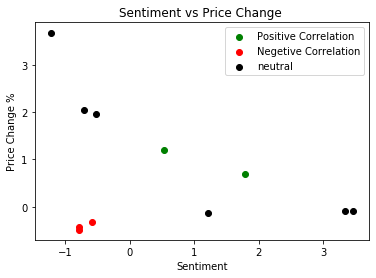

In [74]:
stock_chart(apple)